# Hyperspectral image ground classification
## Using Machine Learning

In [1]:
import utils as u
import preprocessing as pp
import train as tt
import visualization as viz

import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

from keras.utils import np_utils

import spectral
from spectral import spy_colors

/home/meryll/miniconda3/envs/eca/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Globals and hyperparameters

In [43]:
numPCAcomponents = 50
PATCH_SIZE = 5
C1 = 3*numPCAcomponents

batch_size = 128
epochs = 10

classes_authorized = [2,3,5,6,10,0,11,12,14,15]

target_names = ['Maïs- Pas de Technique de Conservation des sols',
                    'Maïs- Minimum Tillage',
                    'Herbe-Pâturage',
                    'Herbe-Arbre',
                    'Soja-Pas de Technique de Conservation des sols', 'Soja-Minimum Tillage','Soja', 'Bois',
                    'Bâtiment-Herbe-Arbre-drives',]

label_dictionary = {
    0: 'Rien',
    1: 'Maïs- Pas de Technique de Conservation des sols', 
    2: 'Maïs- Minimum Tillage',
    3: 'Herbe-Pâturage', 
    4: 'Herbe-Arbre', 
    5: 'Soja-Pas de Technique de Conservation des sols', 
    6: 'Soja-Minimum Tillage',
    7: 'Soja', 
    8: 'Bois', 
    9: 'Bâtiment-Herbe-Arbre-drives',
}

### Preprocessing

In [44]:
X, train_data, test_data = pp.loadData()

In [45]:
train_data = pp.deleteUselessClasses(train_data, classes_authorized)
test_data = pp.deleteUselessClasses(test_data, classes_authorized)

train_data, test_data = pp.shuffleTrainTest(train_data, test_data)

In [46]:
X, pca = pp.dimensionalityReduction(X, numComponents=numPCAcomponents, standardize=False)

In [47]:
X_train, X_test, y_train, y_test = pp.patch_1dim_split(X, train_data, test_data, PATCH_SIZE)

Progress:  |████████████████████████████████████████| 100.0%  Complete

Creating train/test arrays and removing zero labels...
Progress:  |████████████████████████████████████████| 100.0%  Complete
Done.


In [48]:
X_train, y_train = pp.BoostDataset(X_train, y_train, n_samples=100)

Boosting Dataset...
Progress:  |████████████████████████████████████████| 100.0%  Complete


In [49]:
y_train = np_utils.to_categorical(y_train, num_classes=9)
y_test = np_utils.to_categorical(y_test, num_classes=9)

### END PREPROCESSING ###

In [50]:
## Prints preprocessing

t,v = np.unique(train_data, return_counts=True)
print(t, v)
t,v = np.unique(test_data, return_counts=True)
print(t, v)


[0 1 2 3 4 5 6 7 8 9] [16527   695   401   254   380   466  1207   273   637   185]
[0 1 2 3 4 5 6 7 8 9] [16381   733   429   229   350   506  1248   320   628   201]


### Train our model

In [51]:
input_shape= X_train[0].shape

In [52]:
sequential_cnn_model = tt.sequential_cnn_model(input_shape, C1, numPCAcomponents)

# On a 9 classes en réalité, donc une accuracy > 100/9 ~=11.11 est supérieure au hasard. 
sequential_cnn_model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

model = sequential_cnn_model

Epoch 1/10
4598/4598 [==============================] - 3s 596us/step - loss: 1.8816 - acc: 0.3569
Epoch 2/10
4598/4598 [==============================] - 2s 440us/step - loss: 1.1763 - acc: 0.6011
Epoch 3/10
4598/4598 [==============================] - 2s 439us/step - loss: 0.7846 - acc: 0.7292
Epoch 4/10
4598/4598 [==============================] - 2s 442us/step - loss: 0.5701 - acc: 0.8082
Epoch 5/10
4598/4598 [==============================] - 2s 458us/step - loss: 0.4136 - acc: 0.8602
Epoch 6/10
4598/4598 [==============================] - 2s 449us/step - loss: 0.2970 - acc: 0.9041
Epoch 7/10
4598/4598 [==============================] - 2s 447us/step - loss: 0.2163 - acc: 0.9308
Epoch 8/10
4598/4598 [==============================] - 2s 450us/step - loss: 0.1572 - acc: 0.9576
Epoch 9/10
4598/4598 [==============================] - 2s 457us/step - loss: 0.1156 - acc: 0.9678
Epoch 10/10
4598/4598 [==============================] - 2s 463us/step - loss: 0.0863 - acc: 0.9785


### Visualization

In [53]:
y_train.shape

(4598, 9)

In [54]:
classification, confusion, Test_loss, Test_accuracy = viz.reports(model, X_test,y_test, target_names)

[1.5803007e-22 5.7946987e-21 1.0626173e-20 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]
4644/4644 [==============================] - 1s 215us/step


In [55]:
print(classification)

                                                 precision    recall  f1-score   support

Maïs- Pas de Technique de Conservation des sols       0.95      0.92      0.93       733
                          Maïs- Minimum Tillage       0.98      0.91      0.95       429
                                 Herbe-Pâturage       1.00      0.97      0.98       229
                                    Herbe-Arbre       0.99      0.99      0.99       350
 Soja-Pas de Technique de Conservation des sols       0.93      0.92      0.93       506
                           Soja-Minimum Tillage       0.92      0.97      0.94      1248
                                           Soja       0.94      0.89      0.92       320
                                           Bois       0.99      1.00      0.99       628
                    Bâtiment-Herbe-Arbre-drives       0.95      0.95      0.95       201

                                    avg / total       0.95      0.95      0.95      4644



Normalized confusion matrix


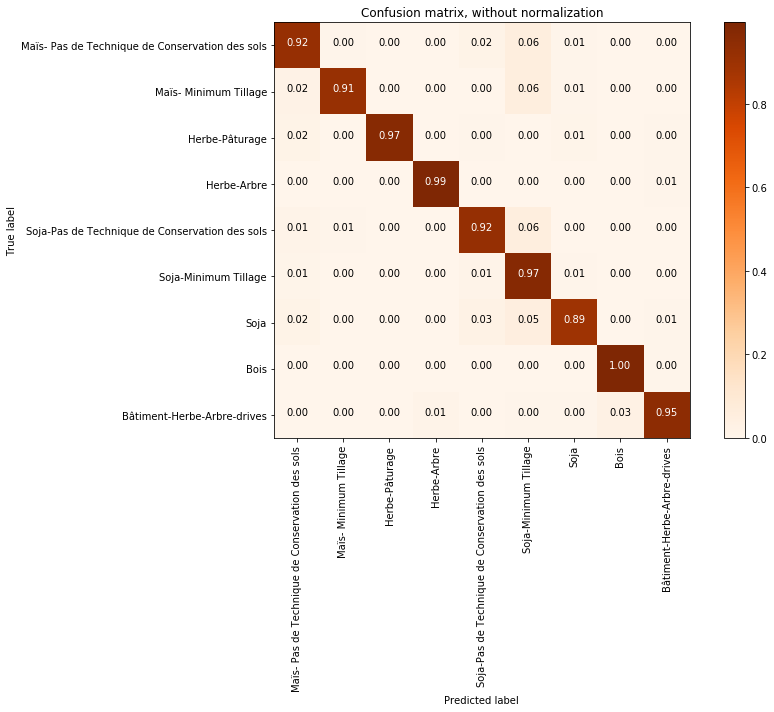

In [56]:
plt.figure(figsize=(13, 10))
viz.plot_confusion_matrix(confusion, classes=target_names,
                      title='Confusion matrix, without normalization')

In [57]:
X_garbage, train_data, test_data = pp.loadData()
#X = dimensionalityReduction(X, )
y = np.add(train_data, test_data)
y = pp.deleteUselessClasses(y, classes_authorized)

In [58]:
outputs = viz.createPredictedImage(X, y, model, 5, 145, 145)

Progress:  |████████████████████████████████████████| 100.0%  Complete


[0 1 2 3 4 5 6 7 8 9]


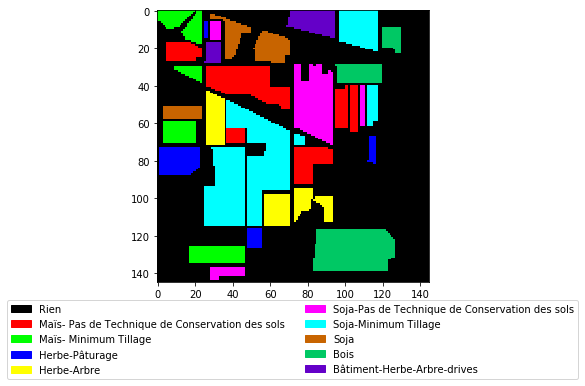

In [59]:
ground_truth = spectral.imshow(classes = y,figsize =(5,5))
print(np.unique(y))

labelPatches = [ patches.Patch(color=spy_colors[x]/255.,
                 label=label_dictionary[x]) for x in np.unique(y) ]
plt.legend(handles=labelPatches, ncol=2, fontsize='medium', 
           loc='upper center', bbox_to_anchor=(0.5, -0.05));

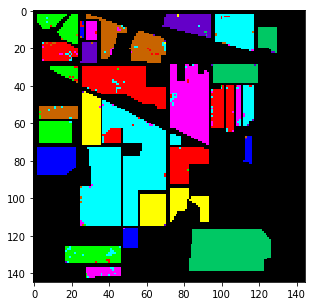

In [60]:
predict_image = spectral.imshow(classes = outputs.astype(int),figsize =(5,5))